Accuracy on training set: 0.981
Accuracy on test set: 0.462


/home/arkastor/Development/Commercial-Brand-Differentiating-Message-Analysis/app/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


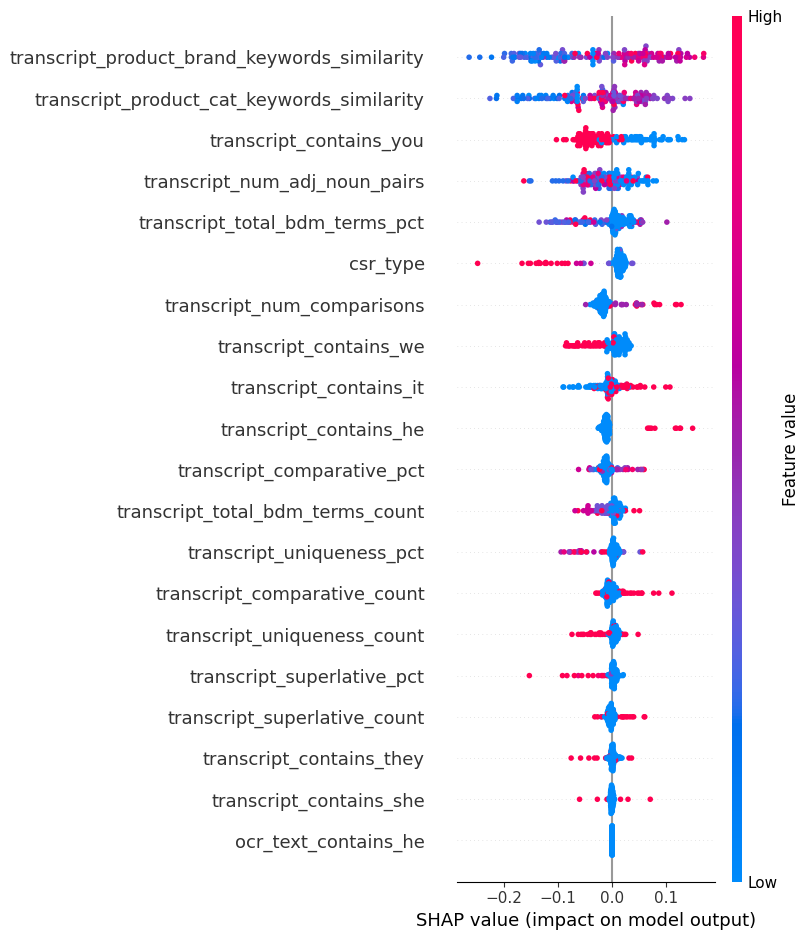

In [1]:
from sklearn.ensemble import RandomForestClassifier
# import test train split
from sklearn.model_selection import train_test_split
import pandas as pd
data = pd.read_csv('csvs/industry_and_brand_specific.csv')
X = data.drop(columns=['BDM'])
y = data['BDM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=30, max_depth=20, random_state=0, max_features='sqrt',\
                            class_weight='balanced')
rf.fit(X_train, y_train)

# Make predictions for the test set
y_pred_test = rf.predict(X_test)

# Print accuracy for the training and test sets
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))
# print confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_test)
# print classification report
samples = X_train

import shap

# Initialize the TreeExplainer with your trained model
explainer = shap.TreeExplainer(rf)

# Compute SHAP values for your training samples
shap_values = explainer.shap_values(X_train, approximate=False, check_additivity=False)

# Generate a summary plot for class 1 (for example)
shap_values_class_1 = shap_values[:, :, 1]
shap.summary_plot(shap_values_class_1, X_train)



